## EDA (Exploratory Data Analysis) with linear regression by Natalia Lappalainen - 10/2023

NOTE: I will include comments for some actions, terms, and conclusions in Russian for my own reference. Please, don't let this cause any inconvenience.

### The aim of this analysis is to determine the factors that influence life expectancy.

### Used source:
https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated/data

Data contains life expectancy, health, immunization, and economic and demographic information about 179 countries from 2000-2015 years. The adjusted dataset has 21 variables and 2.864 rows.

### Key factors:
- Country - List of the 179 countries
- Region - 179 countries are distributed in 9 regions. E.g. Africa, Asia, Oceania, European Union, Rest of Europe and etc.
- Year - Years observed from 2000 to 2015
- Infant_deaths - Number of Infant Deaths per 1000 population
- Under_five_deaths - Represents deaths of children under five years old per 1000 population
- Adult Mortality - Represents deaths of adults per 1000 population
- Alcohol_consumption - Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old
- Hepatitis B - Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.
- Measles - Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds
- BMI - Average Body Mass Index of entire population
- Polio - Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.
- Diphtheria - Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.
- Incidents_HIV - Incidents of HIV per 1000 population aged 15-49
- GDP_per_capita - GDP per capita in current USD
- Population_mln - Total population in millions
- Thinnes_ten_nineteen_years - Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 standard deviations below the median.
- Thinnes_five_nine_years - Prevalence of thinness among children aged 5-9 years. BMI < -2 standard deviations below the median.
- Schooling - Average years that people aged 25+ spent in formal education
- Economy_status_Developed - Developed country
- Economy_status_Developing - Developing country
- Life_expectancy - Average life expectancy of both genders in different years from 2010 to 2015

### Hypotheses:

- Time Trend Hypothesis: Does life expectancy increase or decrease linearly over time?
- Infectious Disease Control Hypothesis: Does life expectancy depend on infectious disease control measures, such as vaccination programs? 
- Education Hypothesis: Exploring the correlation between education levels in a country and life expectancy. 
- BMI and thinnes Hypotesis: Does higher average bMI and lower rates of thinnes affect life expectancy?

STEPS:
1. Extracting the Data
2. Transforming the Data
3. Modeling
4. Testing
5. Evaluation

## 1. Extract and explore dataset

In [1]:
# installing and importing libraries and modules we can predict we will need
# more modules could be installed later
# pip install seaborn
# pip install scipy
# pip install scikit-learn

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from scipy import stats

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
# load data
life = pd.read_csv('Life-Expectancy-Data-Updated.csv', sep=',')
life

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0       Turkiye     Middle East  2015           11.1               13.0   
1         Spain  European Union  2015            2.7                3.3   
2         India            Asia  2007           51.5               67.9   
3        Guyana   South America  2006           32.8               40.5   
4        Israel     Middle East  2012            3.4                4.3   
...         ...             ...   ...            ...                ...   
2859      Niger          Africa  2000           97.0              224.9   
2860   Mongolia            Asia  2009           23.9               28.6   
2861  Sri Lanka            Asia  2004           17.7               28.9   
2862  Lithuania  European Union  2002            7.9                9.9   
2863    Iceland  Rest of Europe  2011            2.1                2.6   

      Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0            105.8240                1.320           97       65  27.8  ...   
1             57.9025               10.350           97       94  26.0  ...   
2            201.0765                1.570           60       35  21.2  ...   
3            222.1965                5.680           93       74  25.3  ...   
4             57.9510                2.890           97       89  27.0  ...   
...               ...                  ...          ...      ...   ...  ...   
2859         291.8240                0.092           72       64  20.8  ...   
2860         235.2330                6.560           97       97  25.3  ...   
2861         134.8950                1.560           62       95  21.9  ...   
2862         204.0120               11.000           94       95  26.1  ...   
2863          50.5745                6.840           88       90  26.1  ...   

      Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0             97           0.08           11006           78.53   
1             97           0.09           25742           46.44   
2             64           0.13            1076         1183.21   
3             93           0.79            4146            0.75   
4             94           0.08           33995            7.91   
...          ...            ...             ...             ...   
2859          34           0.49             399           11.33   
2860          95           0.02            2515            2.67   
2861          97           0.02            2130           19.39   
2862          95           0.05            7424            3.44   
2863          95           0.05           48934            0.32   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                             4.9                       4.8        7.8   
1                             0.6                       0.5        9.7   
2                            27.1                      28.0        5.0   
3                             5.7                       5.5        7.9   
4                             1.2                       1.1       12.8   
...                           ...                       ...        ...   
2859                         12.8                      12.9        1.1   
2860                          2.2                       2.3        9.1   
2861                         15.4                      15.5       10.3   
2862                          3.3                       3.3       11.1   
2863                          0.9                       0.9       11.0   

      Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                            0                          1             76.5  
1                            1                          0             82.8  
2                            0                          1             65.4  
3                            0                          1             67.0  
4                            1                          0             81.7  
..

In [3]:
# explore data structure
life.info()
print('Duplicates:',life.duplicated().sum())
print('Missing values:', (life.isnull().sum().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

The dataset is free from null values, duplicates and comprises a mix of object, int64, and float64 data types.

In [4]:
# generate descriptive statistics
life.describe().T

count          mean           std       min  \
Year                         2864.0   2007.500000      4.610577  2000.000   
Infant_deaths                2864.0     30.363792     27.538117     1.800   
Under_five_deaths            2864.0     42.938268     44.569974     2.300   
Adult_mortality              2864.0    192.251775    114.910281    49.384   
Alcohol_consumption          2864.0      4.820882      3.981949     0.000   
Hepatitis_B                  2864.0     84.292598     15.995511    12.000   
Measles                      2864.0     77.344972     18.659693    10.000   
BMI                          2864.0     25.032926      2.193905    19.800   
Polio                        2864.0     86.499651     15.080365     8.000   
Diphtheria                   2864.0     86.271648     15.534225    16.000   
Incidents_HIV                2864.0      0.894288      2.381389     0.010   
GDP_per_capita               2864.0  11540.924930  16934.788931   148.000   
Population_mln               2864.0     36.675915    136.485867     0.080   
Thinness_ten_nineteen_years  2864.0      4.865852      4.438234     0.100   
Thinness_five_nine_years     2864.0      4.899825      4.525217     0.100   
Schooling                    2864.0      7.632123      3.171556     1.100   
Economy_status_Developed     2864.0      0.206704      0.405012     0.000   
Economy_status_Developing    2864.0      0.793296      0.405012     0.000   
Life_expectancy              2864.0     68.856075      9.405608    39.400   

                                    25%        50%           75%          max  
Year                         2003.75000  2007.5000   2011.250000    2015.0000  
Infant_deaths                   8.10000    19.6000     47.350000     138.1000  
Under_five_deaths               9.67500    23.1000     66.000000     224.9000  
Adult_mortality               106.91025   163.8415    246.791375     719.3605  
Alcohol_consumption             1.20000     4.0200      7.777500      17.8700  
Hepatitis_B                    78.00000    89.0000     96.000000      99.0000  
Measles                        64.00000    83.0000     93.000000      99.0000  
BMI                            23.20000    25.5000     26.400000      32.1000  
Polio                          81.00000    93.0000     97.000000      99.0000  
Diphtheria                     81.00000    93.0000     97.000000      99.0000  
Incidents_HIV                   0.08000     0.1500      0.460000      21.6800  
GDP_per_capita               1415.75000  4217.0000  12557.000000  112418.0000  
Population_mln                  2.09750     7.8500     23.687500    1379.8600  
Thinness_ten_nineteen_years     1.60000     3.3000      7.200000      27.7000  
Thinness_five_nine_years        1.60000     3.4000      7.300000      28.6000  
Schooling                       5.10000     7.8000     10.300000      14.1000  
Economy_status_Developed        0.00000     0.0000      0.000000       1.0000  
Economy_status_Developing       1.00000     1.0000      1.000000       1.0000  
Life_expectancy                62.70000    71.4000     75.400000      83.8000

## 2. Transforming the Data

Let's ponder how should we change the Data for better research results?

We may drop some columns, that may seems unnecessary, depending on how we want to proceed with the Data exploring.

For example, if we want to explore data in general, we can try to drop following details:
Country, Region, Year, Death, Mortality, Economy status.

In [5]:
life_dropped = life.copy()
life_dropped.drop(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Economy_status_Developed', 'Economy_status_Developing'], axis=1, inplace=True)
life_dropped

Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  Diphtheria  \
0                   1.320           97       65  27.8     97          97   
1                  10.350           97       94  26.0     97          97   
2                   1.570           60       35  21.2     67          64   
3                   5.680           93       74  25.3     92          93   
4                   2.890           97       89  27.0     94          94   
...                   ...          ...      ...   ...    ...         ...   
2859                0.092           72       64  20.8     41          34   
2860                6.560           97       97  25.3     96          95   
2861                1.560           62       95  21.9     97          97   
2862               11.000           94       95  26.1     97          95   
2863                6.840           88       90  26.1     95          95   

      Incidents_HIV  GDP_per_capita  Population_mln  \
0              0.08           11006           78.53   
1              0.09           25742           46.44   
2              0.13            1076         1183.21   
3              0.79            4146            0.75   
4              0.08           33995            7.91   
...             ...             ...             ...   
2859           0.49             399           11.33   
2860           0.02            2515            2.67   
2861           0.02            2130           19.39   
2862           0.05            7424            3.44   
2863           0.05           48934            0.32   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                             4.9                       4.8        7.8   
1                             0.6                       0.5        9.7   
2                            27.1                      28.0        5.0   
3                             5.7                       5.5        7.9   
4                             1.2                       1.1       12.8   
...                           ...                       ...        ...   
2859                         12.8                      12.9        1.1   
2860                          2.2                       2.3        9.1   
2861                         15.4                      15.5       10.3   
2862                          3.3                       3.3       11.1   
2863                          0.9                       0.9       11.0   

      Life_expectancy  
0                76.5  
1                82.8  
2                65.4  
3                67.0  
4                81.7  
...               ...  
2859             49.9  
2860             66.9  
2861             74.3  
2862             71.8  
2863             82.4  

[2864 rows x 13 columns]

### Skewness and kurtosis

Skewness is a statistical measure that assesses the asymmetry of a probability distribution. It quantifies the extent to which the data is skewed or shifted to one side.

* 0 = normally distributed
* Skewness between -0.5 and 0.5: symmetrical
* Skew > 0: more weight in the left tail of the distribution
* < 0: more weight in the right tail of the distribution
* Skew > 1 or < -1: moderately skewed
* Skew > 2 or < -2: highly skewed distribution

Kurtosis is a statistical measure that quantifies the shape of a probability distribution. It provides information about the tails and peakedness of the distribution compared to a normal distribution.

Types of Excess Kurtosis
1. Leptokurtic or heavy-tailed distribution (kurtosis more than normal distribution).
2. Mesokurtic (kurtosis same as the normal distribution).
3. Platykurtic or short-tailed distribution (kurtosis less than normal distribution).

High kurtosis tend to have heavy tails or outliers.

In [6]:
# measure the skewness of the Data
# чем дальше показатель асимметрии (skewness) от нуля, тем ассиметрия "тяжелее"
life_dropped.skew()

Alcohol_consumption            0.571192
Hepatitis_B                   -1.658973
Measles                       -0.994008
BMI                           -0.121106
Polio                         -1.726452
Diphtheria                    -1.826928
Incidents_HIV                  4.978735
GDP_per_capita                 2.377248
Population_mln                 8.157684
Thinness_ten_nineteen_years    1.701487
Thinness_five_nine_years       1.769183
Schooling                     -0.159410
Life_expectancy               -0.770242
dtype: float64

In [7]:
# measure the kurtosis of the Data
# чем дальше показатель эксцесса (kurtosis) от нуля, тем эксцесс "тяжелее"
life_dropped.kurt()

Alcohol_consumption            -0.732403
Hepatitis_B                     2.721257
Measles                         0.713809
BMI                            -0.150825
Polio                           2.726907
Diphtheria                      3.122858
Incidents_HIV                  28.688935
GDP_per_capita                  6.450232
Population_mln                 70.472298
Thinness_ten_nineteen_years     3.908966
Thinness_five_nine_years        4.302524
Schooling                      -1.039250
Life_expectancy                -0.216851
dtype: float64

Heavy skewness detected in Population, HIV and GDP.

Kurtosis should be lower to be suitable for linear regression.

In this situation we could decide to drop some outliers, what should improve the Data.

In [8]:
# removing outliers
life_less_outliers = life_dropped.copy()
col_names = life_less_outliers.columns.values.tolist()
for each in col_names:
    life_less_outliers.loc[np.abs(stats.zscore(life_less_outliers[each])) > 3, each] = np.NaN
life_less_outliers

Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  Diphtheria  \
0                   1.320         97.0     65.0  27.8   97.0        97.0   
1                  10.350         97.0     94.0  26.0   97.0        97.0   
2                   1.570         60.0     35.0  21.2   67.0        64.0   
3                   5.680         93.0     74.0  25.3   92.0        93.0   
4                   2.890         97.0     89.0  27.0   94.0        94.0   
...                   ...          ...      ...   ...    ...         ...   
2859                0.092         72.0     64.0  20.8    NaN         NaN   
2860                6.560         97.0     97.0  25.3   96.0        95.0   
2861                1.560         62.0     95.0  21.9   97.0        97.0   
2862               11.000         94.0     95.0  26.1   97.0        95.0   
2863                6.840         88.0     90.0  26.1   95.0        95.0   

      Incidents_HIV  GDP_per_capita  Population_mln  \
0              0.08         11006.0           78.53   
1              0.09         25742.0           46.44   
2              0.13          1076.0             NaN   
3              0.79          4146.0            0.75   
4              0.08         33995.0            7.91   
...             ...             ...             ...   
2859           0.49           399.0           11.33   
2860           0.02          2515.0            2.67   
2861           0.02          2130.0           19.39   
2862           0.05          7424.0            3.44   
2863           0.05         48934.0            0.32   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                             4.9                       4.8        7.8   
1                             0.6                       0.5        9.7   
2                             NaN                       NaN        5.0   
3                             5.7                       5.5        7.9   
4                             1.2                       1.1       12.8   
...                           ...                       ...        ...   
2859                         12.8                      12.9        1.1   
2860                          2.2                       2.3        9.1   
2861                         15.4                      15.5       10.3   
2862                          3.3                       3.3       11.1   
2863                          0.9                       0.9       11.0   

      Life_expectancy  
0                76.5  
1                82.8  
2                65.4  
3                67.0  
4                81.7  
...               ...  
2859             49.9  
2860             66.9  
2861             74.3  
2862             71.8  
2863             82.4  

[2864 rows x 13 columns]

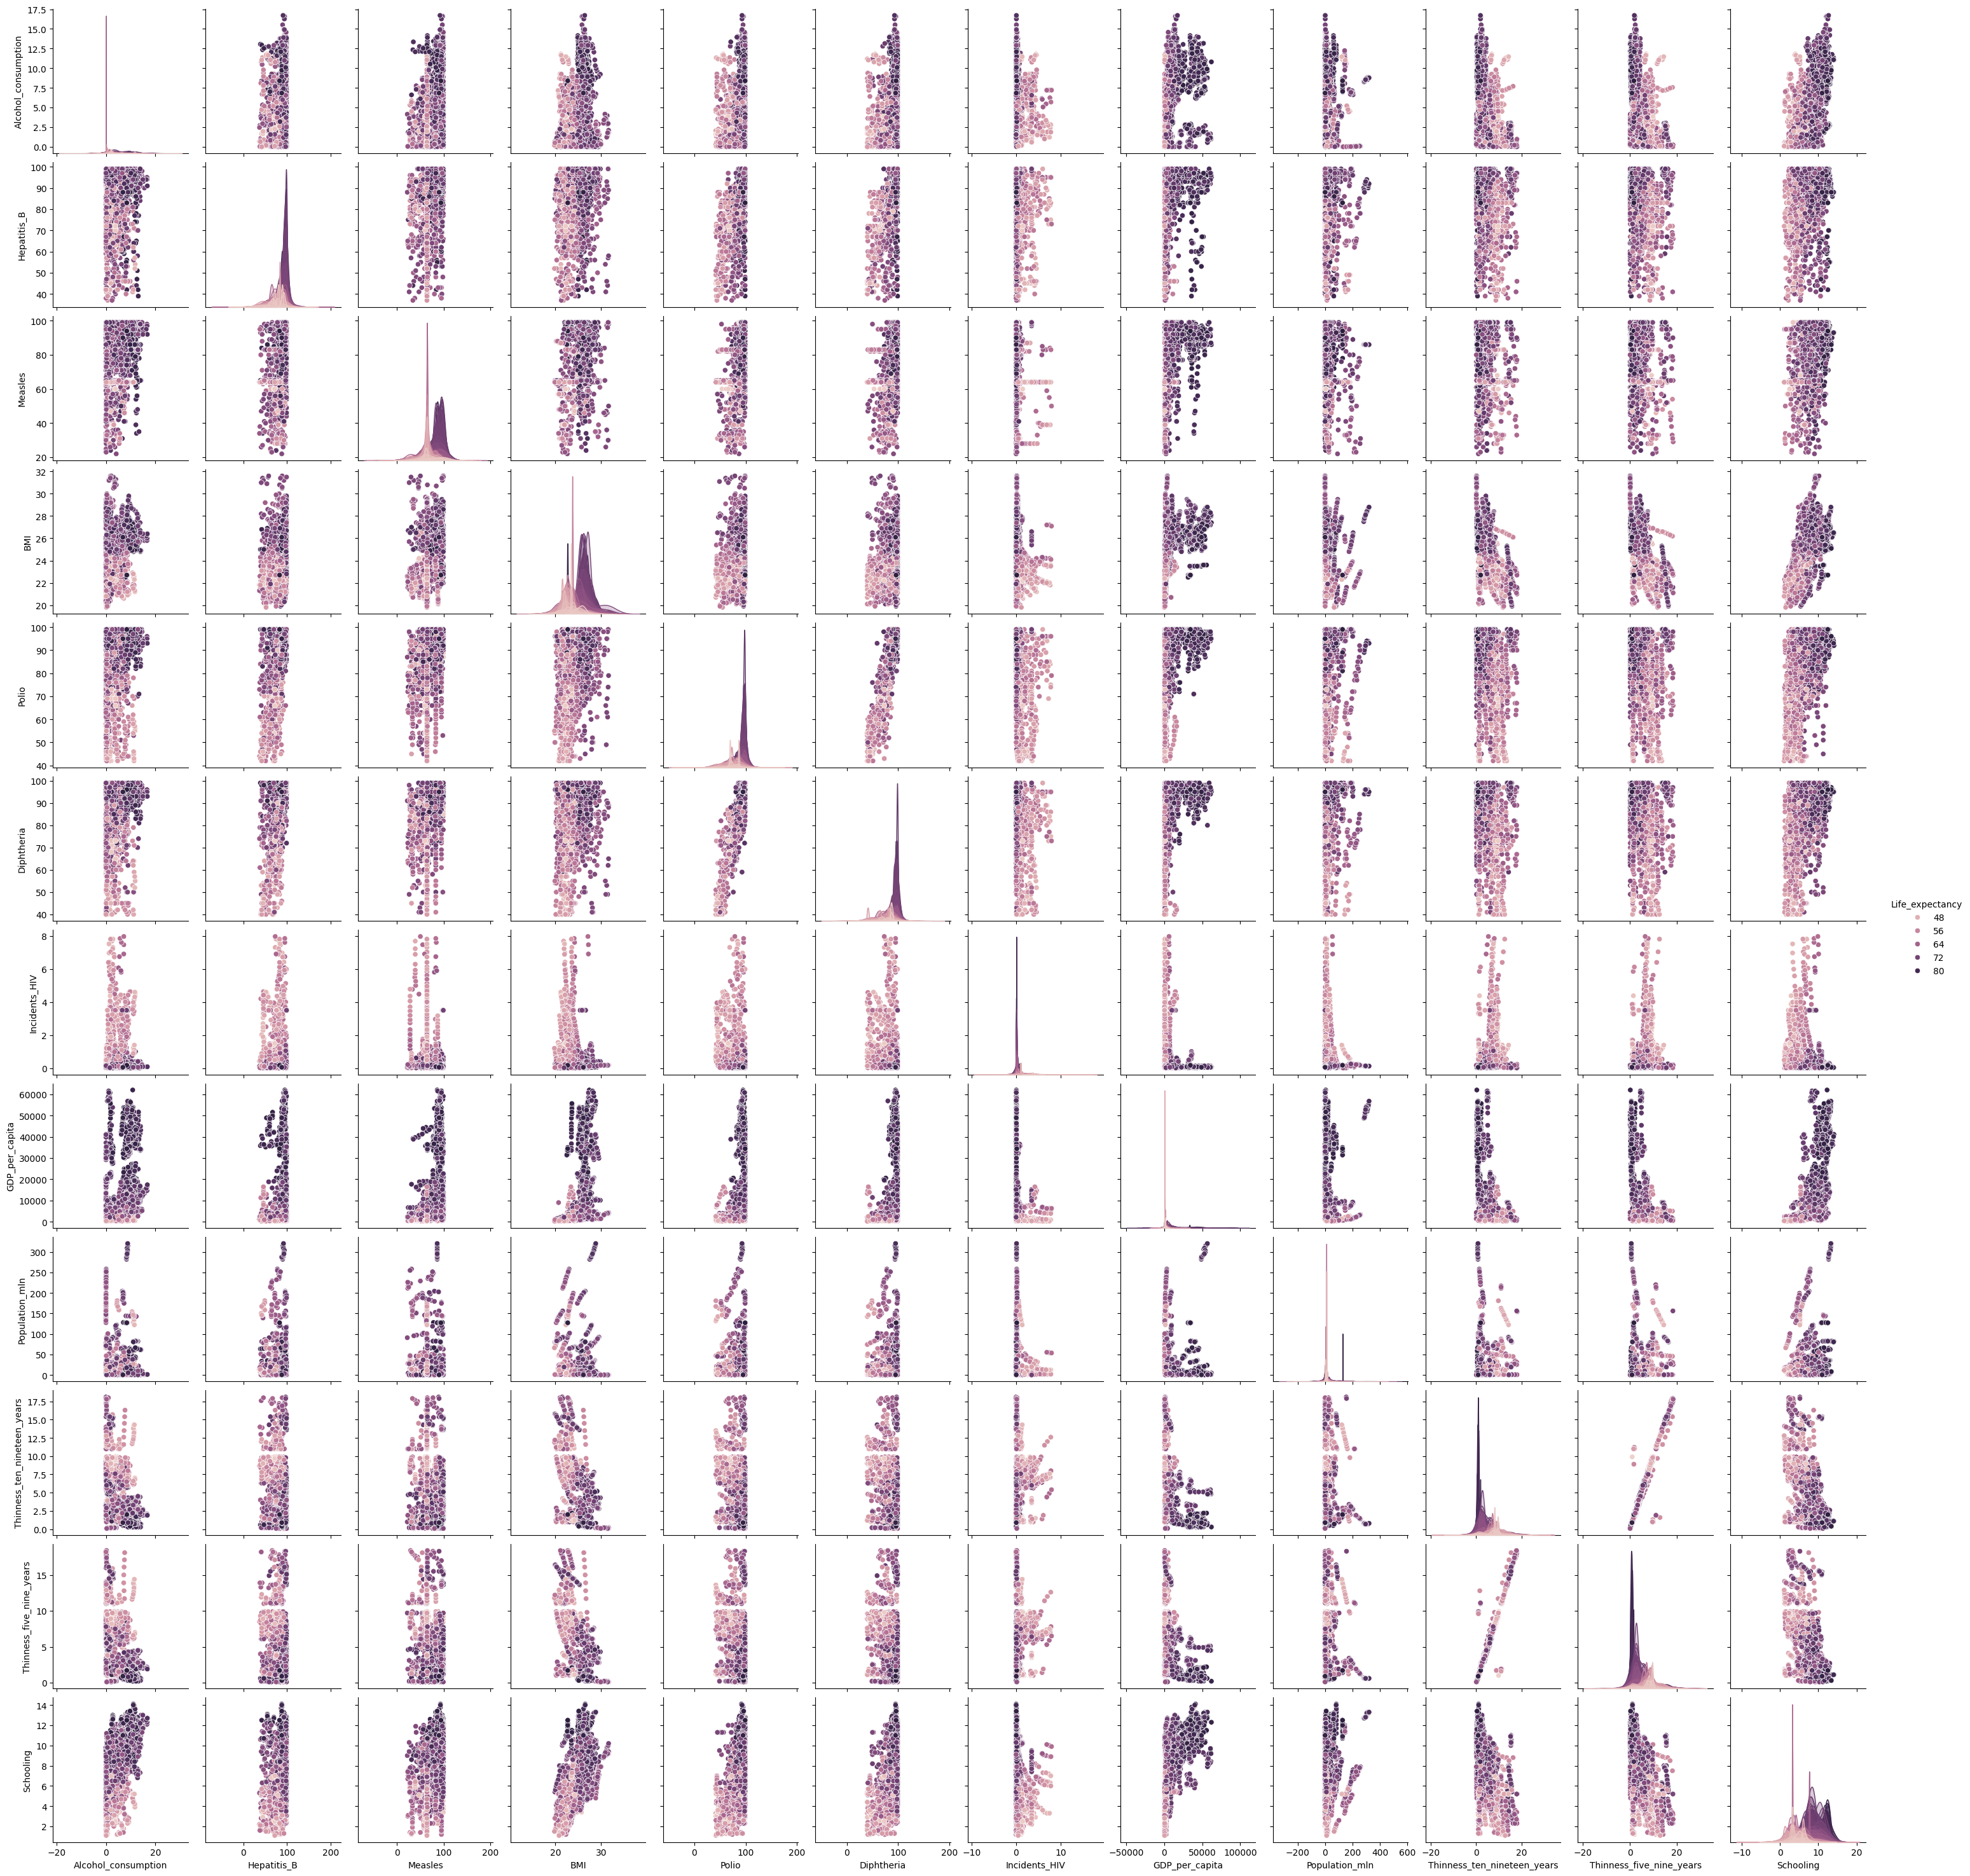

In [9]:
# pairplot display
sns.pairplot(life_less_outliers, hue='Life_expectancy', height=2.5,
            kind='scatter')

## Next, I decided to divide and explore unconverted Data as follows:
1) Status-based analysis (Developed, Developing)
2) Region-based scatters and VIF (Africa, Middle East, European Union, Rest of Europe, Asia, Oceania, Central America and Caribbean, North America, South America)

### 1) Status-based analysis (Developed, Developing)

In [10]:
life.shape

(2864, 21)

In [11]:
# create new dataframe that contains only the numerical columns
life_num = life.select_dtypes(include=np.number)
life_num

# alternately we could convert datatypes to float
#life = life.astype(float)

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
0     2015           11.1               13.0         105.8240   
1     2015            2.7                3.3          57.9025   
2     2007           51.5               67.9         201.0765   
3     2006           32.8               40.5         222.1965   
4     2012            3.4                4.3          57.9510   
...    ...            ...                ...              ...   
2859  2000           97.0              224.9         291.8240   
2860  2009           23.9               28.6         235.2330   
2861  2004           17.7               28.9         134.8950   
2862  2002            7.9                9.9         204.0120   
2863  2011            2.1                2.6          50.5745   

      Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  Diphtheria  \
0                   1.320           97       65  27.8     97          97   
1                  10.350           97       94  26.0     97          97   
2                   1.570           60       35  21.2     67          64   
3                   5.680           93       74  25.3     92          93   
4                   2.890           97       89  27.0     94          94   
...                   ...          ...      ...   ...    ...         ...   
2859                0.092           72       64  20.8     41          34   
2860                6.560           97       97  25.3     96          95   
2861                1.560           62       95  21.9     97          97   
2862               11.000           94       95  26.1     97          95   
2863                6.840           88       90  26.1     95          95   

      Incidents_HIV  GDP_per_capita  Population_mln  \
0              0.08           11006           78.53   
1              0.09           25742           46.44   
2              0.13            1076         1183.21   
3              0.79            4146            0.75   
4              0.08           33995            7.91   
...             ...             ...             ...   
2859           0.49             399           11.33   
2860           0.02            2515            2.67   
2861           0.02            2130           19.39   
2862           0.05            7424            3.44   
2863           0.05           48934            0.32   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                             4.9                       4.8        7.8   
1                             0.6                       0.5        9.7   
2                            27.1                      28.0        5.0   
3                             5.7                       5.5        7.9   
4                             1.2                       1.1       12.8   
...                           ...                       ...        ...   
2859                         12.8                      12.9        1.1   
2860                          2.2                       2.3        9.1   
2861                         15.4                      15.5       10.3   
2862                          3.3                       3.3       11.1   
2863                          0.9                       0.9       11.0   

      Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                            0                          1             76.5  
1                            1                          0             82.8  
2                            0                          1             65.4  
3                            0                          1             67.0  
4                            1                          0             81.7  
...                        ...                        ...              ...  
2859                         0                          1             49.9  
2860                         0                          1             66.9  
2861                         0                          1            

At this stage we could standardize the Data as follows, but we will not in our case.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_life = scaler.fit_transform(life_num)

convert the scaled data into dataframe
scaled_life = pd.DataFrame(scaled_life,columns=life_num.columns)

Data standardization converts data into a standard format that computers can read and understand. This is important because it allows different systems to share and efficiently use data. Without data standardization, it would not be effortless for different approaches to communicate and exchange information.

### Let's check how Life expectancy differ between Developed and Developing countries in general.

In [12]:
# combine columns with the Developed and Developing countries status to one new column
life_devstatus = life_num.copy()

life_devstatus['Economy_status_Developed'].replace(0, '', inplace=True)
life_devstatus['Economy_status_Developing'].replace(1, '0', inplace=True)

life_devstatus["Economy_status"] = life_devstatus['Economy_status_Developed'] + life_devstatus['Economy_status_Developing']
life_devstatus = life_devstatus.drop(['Economy_status_Developed','Economy_status_Developing'], axis=1)
life_devstatus

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
0     2015           11.1               13.0         105.8240   
1     2015            2.7                3.3          57.9025   
2     2007           51.5               67.9         201.0765   
3     2006           32.8               40.5         222.1965   
4     2012            3.4                4.3          57.9510   
...    ...            ...                ...              ...   
2859  2000           97.0              224.9         291.8240   
2860  2009           23.9               28.6         235.2330   
2861  2004           17.7               28.9         134.8950   
2862  2002            7.9                9.9         204.0120   
2863  2011            2.1                2.6          50.5745   

      Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  Diphtheria  \
0                   1.320           97       65  27.8     97          97   
1                  10.350           97       94  26.0     97          97   
2                   1.570           60       35  21.2     67          64   
3                   5.680           93       74  25.3     92          93   
4                   2.890           97       89  27.0     94          94   
...                   ...          ...      ...   ...    ...         ...   
2859                0.092           72       64  20.8     41          34   
2860                6.560           97       97  25.3     96          95   
2861                1.560           62       95  21.9     97          97   
2862               11.000           94       95  26.1     97          95   
2863                6.840           88       90  26.1     95          95   

      Incidents_HIV  GDP_per_capita  Population_mln  \
0              0.08           11006           78.53   
1              0.09           25742           46.44   
2              0.13            1076         1183.21   
3              0.79            4146            0.75   
4              0.08           33995            7.91   
...             ...             ...             ...   
2859           0.49             399           11.33   
2860           0.02            2515            2.67   
2861           0.02            2130           19.39   
2862           0.05            7424            3.44   
2863           0.05           48934            0.32   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                             4.9                       4.8        7.8   
1                             0.6                       0.5        9.7   
2                            27.1                      28.0        5.0   
3                             5.7                       5.5        7.9   
4                             1.2                       1.1       12.8   
...                           ...                       ...        ...   
2859                         12.8                      12.9        1.1   
2860                          2.2                       2.3        9.1   
2861                         15.4                      15.5       10.3   
2862                          3.3                       3.3       11.1   
2863                          0.9                       0.9       11.0   

      Life_expectancy Economy_status  
0                76.5              0  
1                82.8              1  
2                65.4              0  
3                67.0              0  
4                81.7              1  
...               ...            ...  
2859             49.9              0  
2860             66.9              0  
2861             74.3              0  
2862             71.8              1  
2863             82.4              1  

[2864 rows x 18 columns]

Developing countries with a status of 0 are depicted with blue color, 
while Developed countries with a status of 1 are represented by orange color.


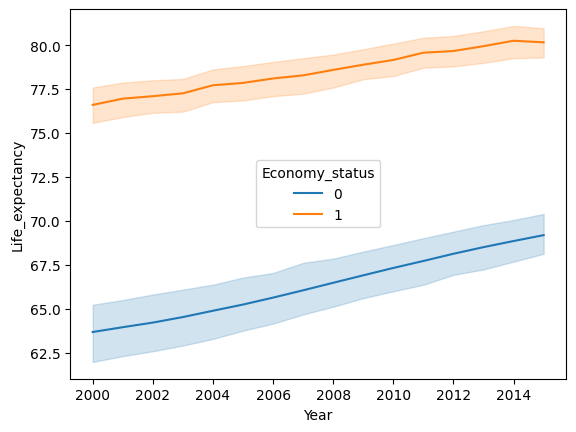

In [13]:
print('Developing countries with a status of 0 are depicted with blue color, \nwhile Developed countries with a status of 1 are represented by orange color.')
sns.lineplot(data=life_devstatus, x='Year', y='Life_expectancy', hue='Economy_status')
plt.legend(title='Economy_status',loc='center')
plt.show()

### We can observe a substantial disparity in life expectancy between developed and developing countries.

### Let's explore Developed and Developing countries separately.

In [14]:
# split set to Developing and Developed sets
life_developed = life_num[life['Economy_status_Developed'] == 1]
life_developing = life_num[life['Economy_status_Developing'] == 1]

# drop unnecessary columns from new datasets
life_developed = life_developed.drop(['Economy_status_Developed','Economy_status_Developing'],axis=1)
life_developing = life_developing.drop(['Economy_status_Developed','Economy_status_Developing'],axis=1)

print('Developed countries:', life_developed.shape)
print('Developing countries:', life_developing.shape)

Developed countries: (592, 17)
Developing countries: (2272, 17)


## 1.1 Developed countries

In [15]:
# drop unnecessary columns
life_developed = life_developed.drop(['Year','Infant_deaths','Under_five_deaths','Adult_mortality','Population_mln'],axis=1)
display(life_developed)

Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  Diphtheria  \
1                   10.35           97       94  26.0     97          97   
4                    2.89           97       89  27.0     94          94   
7                   12.23           88       99  25.9     99          99   
11                   7.47           82       77  27.1     76          74   
14                  10.24           88       71  25.0     94          94   
...                   ...          ...      ...   ...    ...         ...   
2850                10.10           97       83  25.9     98          98   
2855                 8.94           88       92  25.8     95          98   
2856                 8.40           83       94  22.7     99          96   
2862                11.00           94       95  26.1     97          95   
2863                 6.84           88       90  26.1     95          95   

      Incidents_HIV  GDP_per_capita  Thinness_ten_nineteen_years  \
1              0.09           25742                          0.6   
4              0.08           33995                          1.2   
7              0.08            8971                          2.3   
11             0.08           19338                          0.7   
14             0.08           79368                          0.6   
...             ...             ...                          ...   
2850           0.08           39025                          0.9   
2855           0.08           38785                          0.9   
2856           0.17           34387                          2.0   
2862           0.05            7424                          3.3   
2863           0.05           48934                          0.9   

      Thinness_five_nine_years  Schooling  Life_expectancy  
1                          0.5        9.7             82.8  
4                          1.1       12.8             81.7  
7                          2.3       10.2             71.2  
11                         0.7        9.9             79.8  
14                         0.4       12.3             81.5  
...                        ...        ...              ...  
2850                       0.9       11.1             80.0  
2855                       0.8        9.4             78.0  
2856                       1.7       12.5             83.6  
2862                       3.3       11.1             71.8  
2863                       0.9       11.0             82.4  

[592 rows x 12 columns]

With this visualization, we can gain insights into the correlations among various factors.


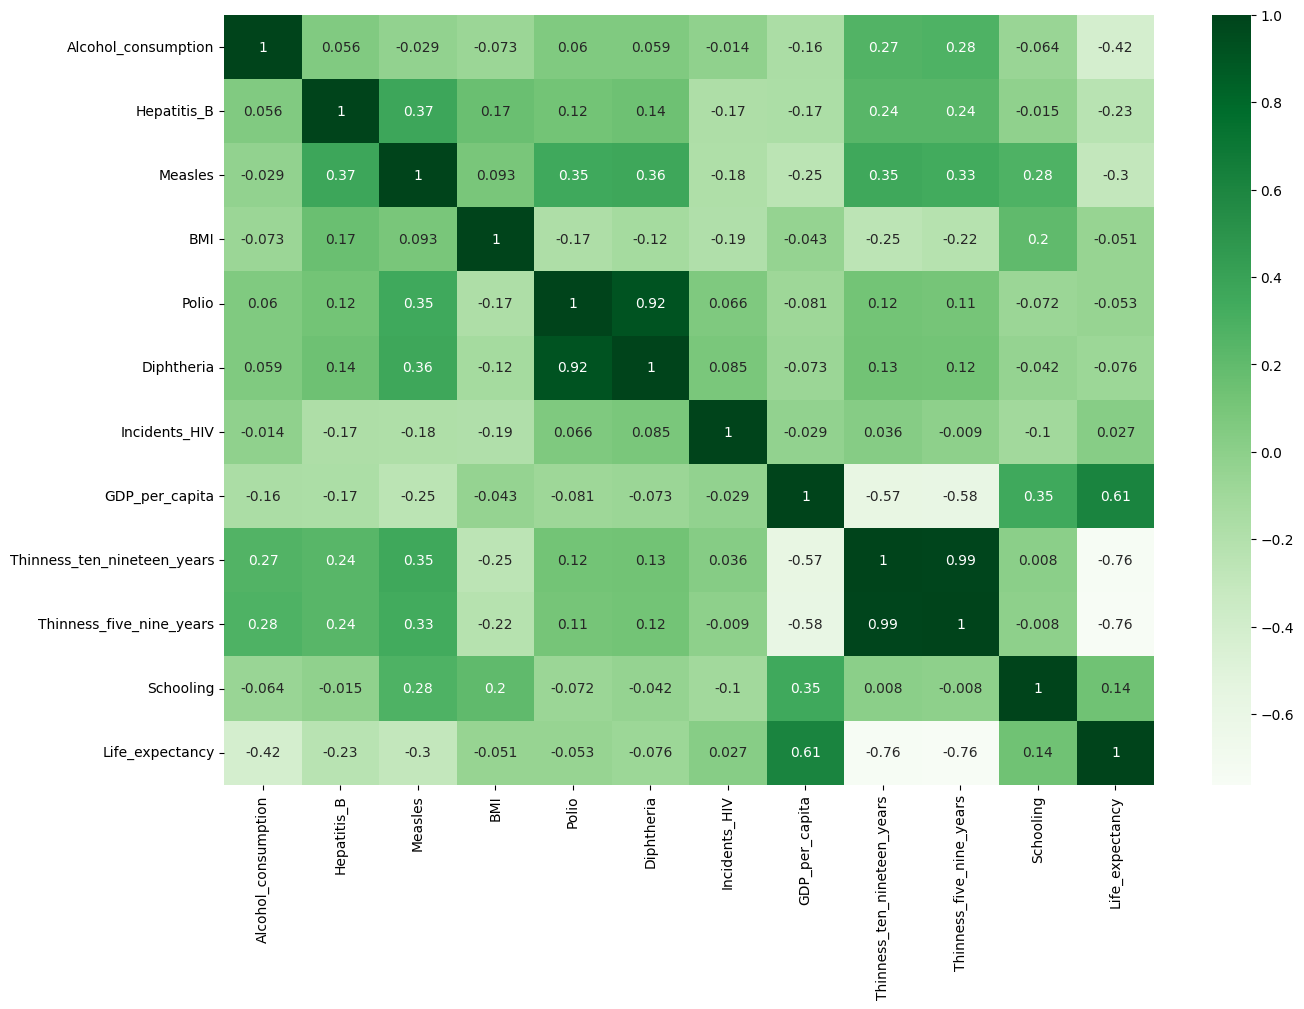

In [16]:
# correlation matrix and heatmap for developed countries
plt.figure(figsize=(15,10))
developed_corrm = life_developed.corr().round(3)
print('With this visualization, we can gain insights into the correlations among various factors.')
sns.heatmap(developed_corrm,annot=True,cmap='Greens')
plt.show()

In [17]:
# collect developed column names to list
col_developed = developed_corrm.columns.values.tolist()
col_developed

['Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Life_expectancy']

In [18]:
# removing values with no strong correlation
# 0.5+ - weak correlation
# 0.7+ - some correlation
# 0.9+ - strong correlation

for each in col_developed:
    developed_corrm.loc[(developed_corrm[each] > -0.5) & (developed_corrm[each] < 0.5), each] = ''
    developed_corrm.loc[(developed_corrm[each] == 1), each] = ''
developed_corrm.round(3)

Alcohol_consumption Hepatitis_B Measles BMI  \
Alcohol_consumption                                                       
Hepatitis_B                                                               
Measles                                                                   
BMI                                                                       
Polio                                                                     
Diphtheria                                                                
Incidents_HIV                                                             
GDP_per_capita                                                            
Thinness_ten_nineteen_years                                               
Thinness_five_nine_years                                                  
Schooling                                                                 
Life_expectancy                                                           

                             Polio Diphtheria Incidents_HIV GDP_per_capita  \
Alcohol_consumption                                                          
Hepatitis_B                                                                  
Measles                                                                      
BMI                                                                          
Polio                                   0.916                                
Diphtheria                   0.916                                           
Incidents_HIV                                                                
GDP_per_capita                                                               
Thinness_ten_nineteen_years                                         -0.572   
Thinness_five_nine_years                                            -0.581   
Schooling                                                                    
Life_expectancy                                                      0.614   

                            Thinness_ten_nineteen_years  \
Alcohol_consumption                                       
Hepatitis_B                                               
Measles                                                   
BMI                                                       
Polio                                                     
Diphtheria                                                
Incidents_HIV                                             
GDP_per_capita                                   -0.572   
Thinness_ten_nineteen_years                               
Thinness_five_nine_years                          0.991   
Schooling                                                 
Life_expectancy                                  -0.755   

                            Thinness_five_nine_years Schooling Life_expectancy  
Alcohol_consumption                                                             
Hepatitis_B                                                                     
Measles                                                                         
BMI                                                                             
Polio                                                                           
Diphtheria                                                                      
Incidents_HIV                                                                   
GDP_per_capita                                -0.581                     0.614  
Thinness_ten_nineteen_years                    0.991                    -0.755  
Thinness_five_nine_years                                                -0.762  
Schooling                                                                       
Life_expectancy                               -0.762

In [19]:
# combine thinnes factor columns to one new Thinness under twenty column
# dropping unnecessary columns with no correllation
life_developed['Thinness_under_twenty'] = life_developed[['Thinness_ten_nineteen_years','Thinness_five_nine_years']].mean(axis=1)
life_developed = life_developed.drop(['Thinness_ten_nineteen_years','Thinness_five_nine_years'], axis=1)
developed_short = life_developed[['Life_expectancy','GDP_per_capita','Thinness_under_twenty']]


In [20]:
# create most significant metrics
developed_short_corrm = developed_short.corr().round(3)
developed_short_corrm = developed_short_corrm.drop(['Life_expectancy'], axis=1)
developed_short_corrm = developed_short_corrm.drop(['GDP_per_capita','Thinness_under_twenty'], axis=0)
print('Most significant metrics for developed countries:')
display(developed_short_corrm)

Most significant metrics for developed countries:


GDP_per_capita  Thinness_under_twenty
Life_expectancy           0.614                  -0.76

Regression for developed countries:


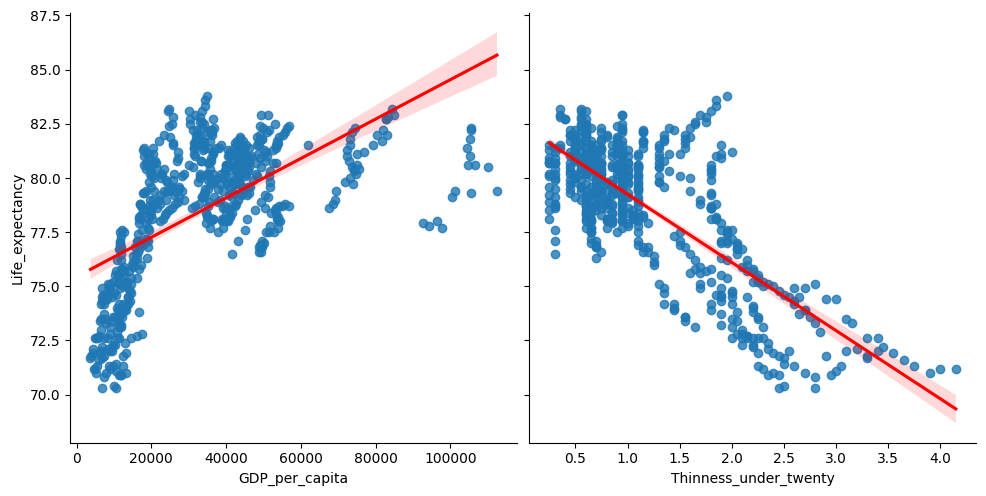

In [21]:
# visualize regression
print('Regression for developed countries:')
sns.pairplot(developed_short, x_vars=['GDP_per_capita','Thinness_under_twenty'], y_vars = 'Life_expectancy',
             height=5, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

GDP per capita increases life expectancy at birth by fostering economic growth in developed countries, leading to an extension of longevity.

Individuals who are obese under the age of twenty are highly likely to remain obese as adults, which significantly increases the probability of a decrease in their life expectancy.

## 1.2 Developing countries

In [22]:
# combine all immunisation columns to one new Immunisation column
# drop unneccesary colums
life_developing['Immunisation'] = life_developing[['Hepatitis_B','Measles','Polio','Diphtheria']].mean(axis=1)
life_developing = life_developing.drop(['Year','Infant_deaths','Under_five_deaths','Adult_mortality','Population_mln','Hepatitis_B','Measles','Polio','Diphtheria'],axis=1)
display(life_developing)

Alcohol_consumption   BMI  Incidents_HIV  GDP_per_capita  \
0                   1.320  27.8           0.08           11006   
2                   1.570  21.2           0.13            1076   
3                   5.680  25.3           0.79            4146   
5                   4.190  26.4           0.16            9110   
6                   8.060  26.2           0.08            9313   
...                   ...   ...            ...             ...   
2857               12.920  25.7           0.05            2617   
2858                0.023  25.6           0.14            5305   
2859                0.092  20.8           0.49             399   
2860                6.560  25.3           0.02            2515   
2861                1.560  21.9           0.02            2130   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                             4.9                       4.8        7.8   
2                            27.1                      28.0        5.0   
3                             5.7                       5.5        7.9   
5                             2.0                       1.9        7.9   
6                             2.3                       2.3       12.0   
...                           ...                       ...        ...   
2857                          2.7                       2.8        8.9   
2858                          7.5                       7.8        8.9   
2859                         12.8                      12.9        1.1   
2860                          2.2                       2.3        9.1   
2861                         15.4                      15.5       10.3   

      Life_expectancy  Immunisation  
0                76.5         89.00  
2                65.4         56.50  
3                67.0         88.00  
5                78.2         88.00  
6                71.2         97.00  
...               ...           ...  
2857             68.9         90.00  
2858             72.6         89.75  
2859             49.9         52.75  
2860             66.9         96.25  
2861             74.3         87.75  

[2272 rows x 9 columns]

With this visualization, we can gain insights into the correlations among various factors.


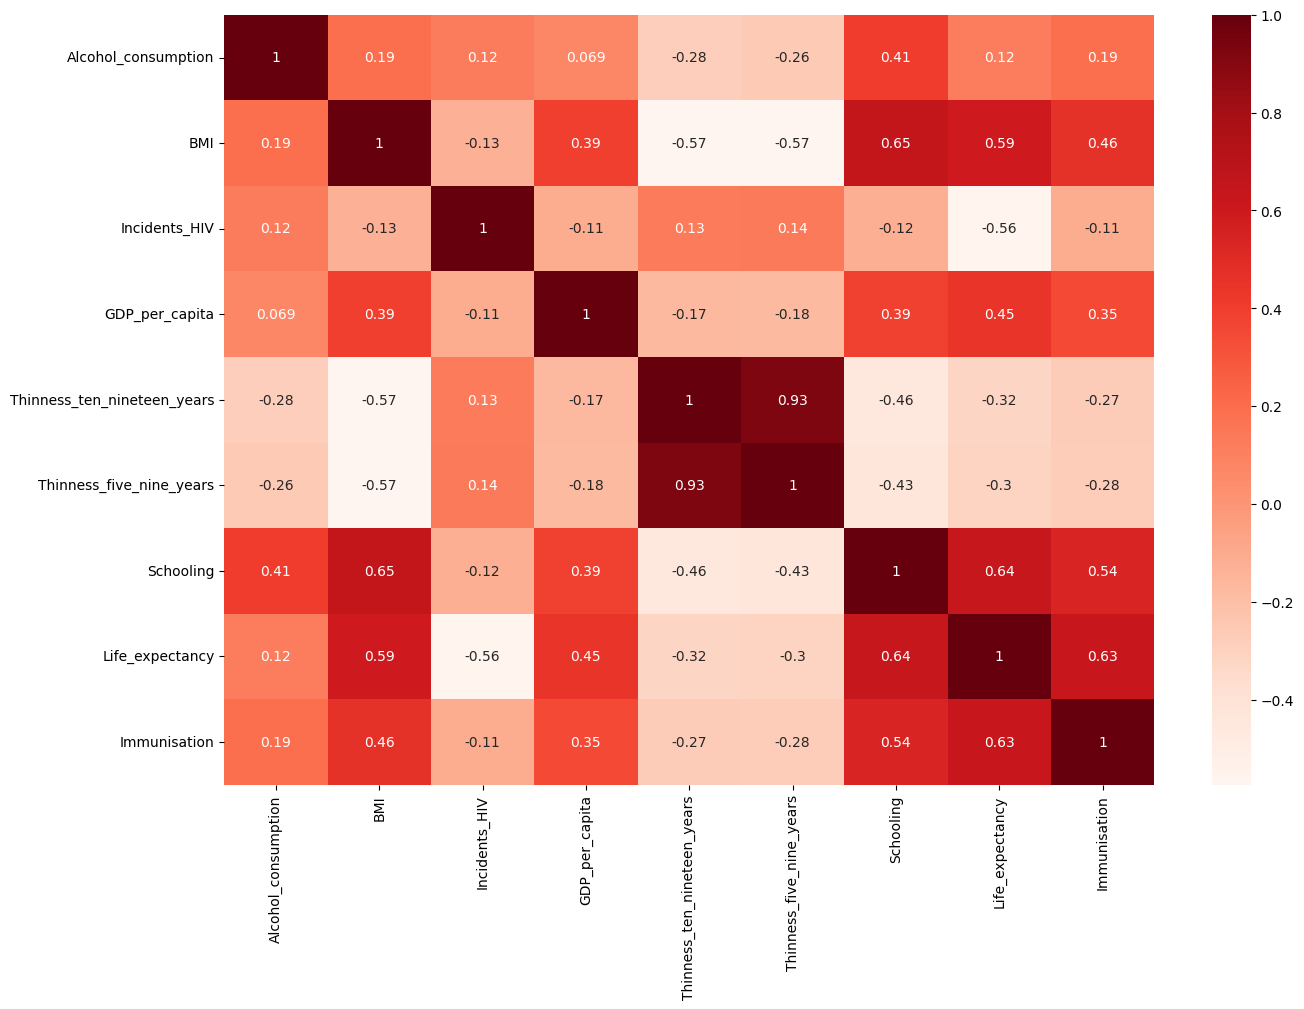

In [23]:
# correlation matrix and heatmap for developing countries
plt.figure(figsize=(15,10))
developing_corrm = life_developing.corr().round(3)
print('With this visualization, we can gain insights into the correlations among various factors.')
sns.heatmap(developing_corrm,annot=True,cmap='Reds')
plt.show()

In [24]:
# collect developing column names to list
col_developing = developing_corrm.columns.values.tolist()
col_developing

['Alcohol_consumption',
 'BMI',
 'Incidents_HIV',
 'GDP_per_capita',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Life_expectancy',
 'Immunisation']

In [25]:
# removing values with no strong correlation
# 0.5+ - weak correlation
# 0.7+ - some correlation
# 0.9+ - strong correlation

for each in col_developing:
    developing_corrm.loc[(developing_corrm[each] >= -0.5) & (developing_corrm[each] <= 0.5), each] = ''
    developing_corrm.loc[(developing_corrm[each] == 1), each] = ''
developing_corrm.round(3)

Alcohol_consumption    BMI Incidents_HIV  \
Alcohol_consumption                                                    
BMI                                                                    
Incidents_HIV                                                          
GDP_per_capita                                                         
Thinness_ten_nineteen_years                     -0.571                 
Thinness_five_nine_years                        -0.574                 
Schooling                                        0.652                 
Life_expectancy                                  0.593        -0.559   
Immunisation                                                           

                            GDP_per_capita Thinness_ten_nineteen_years  \
Alcohol_consumption                                                      
BMI                                                             -0.571   
Incidents_HIV                                                            
GDP_per_capita                                                           
Thinness_ten_nineteen_years                                              
Thinness_five_nine_years                                         0.926   
Schooling                                                                
Life_expectancy                                                          
Immunisation                                                             

                            Thinness_five_nine_years Schooling  \
Alcohol_consumption                                              
BMI                                           -0.574     0.652   
Incidents_HIV                                                    
GDP_per_capita                                                   
Thinness_ten_nineteen_years                    0.926             
Thinness_five_nine_years                                         
Schooling                                                        
Life_expectancy                                          0.636   
Immunisation                                             0.535   

                            Life_expectancy Immunisation  
Alcohol_consumption                                       
BMI                                   0.593               
Incidents_HIV                        -0.559               
GDP_per_capita                                            
Thinness_ten_nineteen_years                               
Thinness_five_nine_years                                  
Schooling                             0.636        0.535  
Life_expectancy                                    0.626  
Immunisation                          0.626

In [26]:
# create new short df with most correlating factors
# create new correlation matrix
developing_short = life_developing[['BMI','Incidents_HIV','Schooling','Immunisation','Life_expectancy']]
developing_short_corrm = developing_short.corr().round(3)

In [27]:
# create most significant metrics
developing_short_corrm = developing_short_corrm.drop(['BMI','Incidents_HIV','Schooling','Immunisation'], axis=0)
developing_short_corrm = developing_short_corrm.drop(['Life_expectancy'], axis=1)

print('Most significant metrics for developing countries:')
display(developing_short_corrm)

Most significant metrics for developing countries:


BMI  Incidents_HIV  Schooling  Immunisation
Life_expectancy  0.593         -0.559      0.636         0.626

Regression for developing countries:


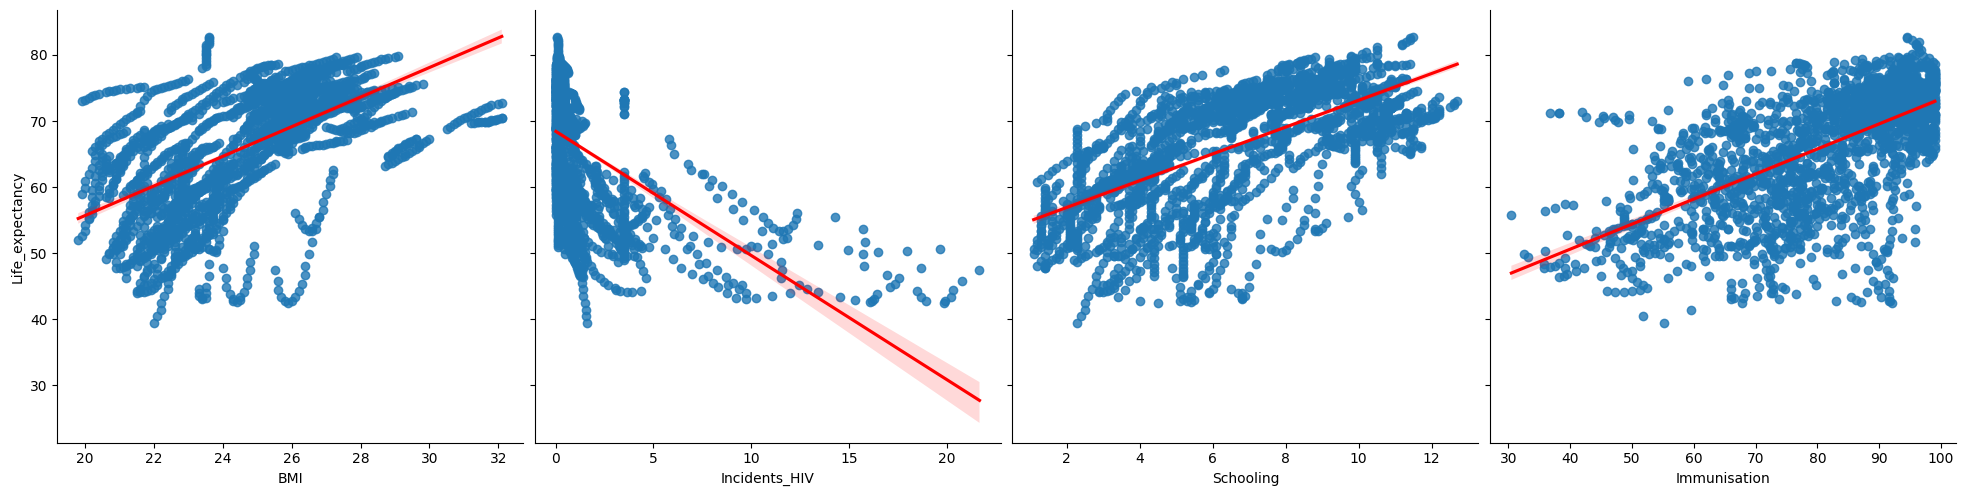

In [28]:
# visualize regression
print('Regression for developing countries:')
sns.pairplot(developing_short, x_vars=['BMI','Incidents_HIV','Schooling','Immunisation'], y_vars = 'Life_expectancy',
             height=5, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

Higher BMI (however under obesity values) - longer life. According to the latest research made by US Rutgers Institute for Health, having a BMI between 25 and 29,9 - classified as 'overweight' - is associated with an 5-7% lower risk of death within the study period that having one in the 'healthy' range.

Immunisation and education level contributes to increase life expectancy as well.

Therefore, a high incidence of HIV cases is associated with a reduction in life expectancy.

## 3. Modeling

### Now, we need to split our DataFrames into the independent (predictor) variables X and the continuous dependent (response) variable Y

### Developed countries

In [29]:
# split the Data to the independent variables and the dependant variable
X_developed = life_developed[['Alcohol_consumption','BMI','Incidents_HIV','GDP_per_capita','Thinness_under_twenty','Schooling']]
y_developed = life_developed.loc[:, 'Life_expectancy']

In [30]:
# split the Data to train and test sets
X_dped_train, X_dped_test, y_dped_train, y_dped_test = train_test_split(X_developed,y_developed, test_size=0.25, random_state=44)    
print('Train data shape:',X_dped_train.shape)
print('Test data shape:',X_dped_test.shape)

Train data shape: (444, 6)
Test data shape: (148, 6)


In [31]:
# fit the training set into the linear regression model
reg_dped = linear_model.LinearRegression()
reg_dped.fit(X_dped_train,y_dped_train)

print("Coefficients:" ,reg_dped.coef_)
print("Intercept:", reg_dped.intercept_)

Coefficients: [-2.63258561e-01 -8.11202340e-01 -9.70034231e-01  1.95627310e-05
 -2.80806713e+00  3.26479838e-01]
Intercept: 101.47680560560815


In [32]:
#calculate predictions
y_dped_pred= pd.DataFrame(reg_dped.predict(X_dped_test))
y_dped_pred['index'] = X_dped_test.index
y_dped_pred.set_index('index', inplace=True, drop=True)
print(y_dped_pred)

               0
index           
1056   74.276877
1034   75.238431
166    75.185610
899    80.976138
2569   79.563017
...          ...
1983   80.759134
1336   77.908321
2768   80.796583
2249   80.550230
767    80.131220

[148 rows x 1 columns]


In [33]:
# count the accuracy of the model with the test data
reg_mse_dped = mean_squared_error(y_dped_test, y_dped_pred)
reg_r2_dped = r2_score(y_dped_test, y_dped_pred) 

In [34]:
# create and fit the Lasso Regression model
lasso_dped = Lasso(alpha=0.001)  # medium alpha
lasso_dped.fit(X_dped_train, y_dped_train)

# make predictions
y_dped_pred = lasso_dped.predict(X_dped_test)

# evaluate the model
lasso_mse_dped = mean_squared_error(y_dped_test, y_dped_pred)
lasso_r2_dped = r2_score(y_dped_test, y_dped_pred)

In [35]:
# fit the training set into the ridge regression model
ridge = Ridge()
kf = KFold()
cv_ridge = cross_val_score(ridge, X_developed, y_developed, cv=kf)
ridge_dped = Ridge(alpha=0.001)
ridge_dped.fit(X_dped_train, y_dped_train)
y_dped_pred_ridge = ridge_dped.predict(X_dped_test)

ridge_mse_dped = mean_squared_error(y_dped_test, y_dped_pred)
ridge_r2_dped = r2_score(y_dped_test, y_dped_pred)

In [36]:
print('Mean Squared Error and R-squared results')
print('Lower MSE values indicate better model performance')
print('Higher R2 values indicate a better fit of the model to the data')
print('')
print('Linear Regression Test dataset result:')
print("MSE = ", reg_mse_dped)
print("R2s = ", reg_r2_dped)
print('')
print('Lasso Regression Test dataset result:')
print("MSE:", lasso_mse_dped)
print("R2:", lasso_r2_dped)
print('')
print('Ridge Regression Test dataset result:')
print("MSE:", ridge_mse_dped)
print("R2:", ridge_r2_dped)

Mean Squared Error and R-squared results
Lower MSE values indicate better model performance
Higher R2 values indicate a better fit of the model to the data

Linear Regression Test dataset result:
MSE =  2.663625775877976
R2s =  0.7525790000288742

Lasso Regression Test dataset result:
MSE: 2.6546823451247246
R2: 0.7534097445727141

Ridge Regression Test dataset result:
MSE: 2.6546823451247246
R2: 0.7534097445727141


### Lasso regression shows the best results in gerneral with this analysis and so could be stated as the best model with this case. MSE of 2.6546 suggests that, on average, the squared difference between the predicted and actual values is 2.65. An R2 value of 0.7534 means that approximately 75.34% of the variance in the dependent variable is explained by the model.

The choice of the number of folds depends on specific goals and dataset characteristics. For a stable and precise estimate of model performance, 10-fold cross-validation is preferable. If the dataset size allows and there is concern about variations between individual fold results, 3-fold cross-validation can also be considered.

In [37]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

# Create LassoCV model
reg_lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0])  # the alpha values could be adjust as needed

# Linear Regression cross-validation
las_k3 = 3
las_scores_dped_3 = cross_val_score(estimator=reg_lasso,
                               X=X_dped_test,
                               y=y_dped_test,
                               cv=las_k3)
las_k5 = 5
las_scores_dped_5 = cross_val_score(estimator=reg_lasso,
                               X=X_dped_test,
                               y=y_dped_test,
                               cv=las_k5)
las_k10 = 10
las_scores_dped_10 = cross_val_score(estimator=reg_lasso,
                               X=X_dped_test,
                               y=y_dped_test,
                               cv=las_k10)

print('Performance of the Lasso Regression model with 3, 5 and 10 folds.')
print()
print('Performance of the model with', las_k3, 'individual folds')
print(las_scores_dped_3)
print("Model performance based on %d-fold cross validation = %.3f" % (las_k3, las_scores_dped_3.mean()))
print()
print('Performance of the model with', las_k5, 'individual folds')
print(las_scores_dped_5)
print("Model performance based on %d-fold cross validation = %.3f" % (las_k5, las_scores_dped_5.mean()))
print()
print('Performance of the model with', las_k10, 'individual folds')
print(las_scores_dped_10)
print("Model performance based on %d-fold cross validation = %.3f" % (las_k10, las_scores_dped_10.mean()))

Performance of the Lasso Regression model with 3, 5 and 10 folds.

Performance of the model with 3 individual folds
[0.69816594 0.71074497 0.74807   ]
Model performance based on 3-fold cross validation = 0.719

Performance of the model with 5 individual folds
[0.65784913 0.79620236 0.71497912 0.68899166 0.71584609]
Model performance based on 5-fold cross validation = 0.715

Performance of the model with 10 individual folds
[0.77280843 0.67783878 0.79357494 0.8047035  0.80098719 0.61890635
 0.79352721 0.53028228 0.68871556 0.68031433]
Model performance based on 10-fold cross validation = 0.716


### Performance of the Lasso Regression model with 3 individual folds shows us less variability across different folds and the highest average performance. Thus model with 3 folds could be considered as the best option in this case.

In [38]:
# calculate residuals (difference between the observed values and the predicted values)
residuals_dped = pd.DataFrame(data = y_dped_test)['Life_expectancy']-y_dped_pred[0]
print(residuals_dped)


1056   -1.483944
1034    0.916056
166     0.216056
899     7.316056
2569    6.116056
          ...   
1983    6.416056
1336    2.816056
2768    4.816056
2249    4.816056
767     6.516056
Name: Life_expectancy, Length: 148, dtype: float64


Next, a table is created to display the actual observations, predicted values, and their differences, also known as residuals, in a structured format.

Остаток — это разница между наблюдаемым значением и прогнозируемым значениемю

In [39]:
# set y_dped_pred as df
y_dped_pred = pd.DataFrame(y_dped_pred)
# reset the index of residuals_dped
residuals_dped.reset_index(drop=True, inplace=True)

# concatenate the DataFrames
residuals_dped_tbl = pd.concat([y_dped_test.reset_index(drop=True), y_dped_pred, residuals_dped], axis=1)
residuals_dped_tbl.columns = ['observed', 'predicted', 'residual']
print(residuals_dped_tbl)

     observed  predicted  residual
0        72.8  74.283944 -1.483944
1        75.2  75.242175  0.916056
2        74.5  75.319110  0.216056
3        81.6  80.992415  7.316056
4        80.4  79.565435  6.116056
..        ...        ...       ...
143      80.7  80.728151  6.416056
144      77.1  77.986097  2.816056
145      79.1  80.770243  4.816056
146      79.1  80.524975  4.816056
147      80.8  80.143815  6.516056

[148 rows x 3 columns]


<Figure size 640x480 with 0 Axes>

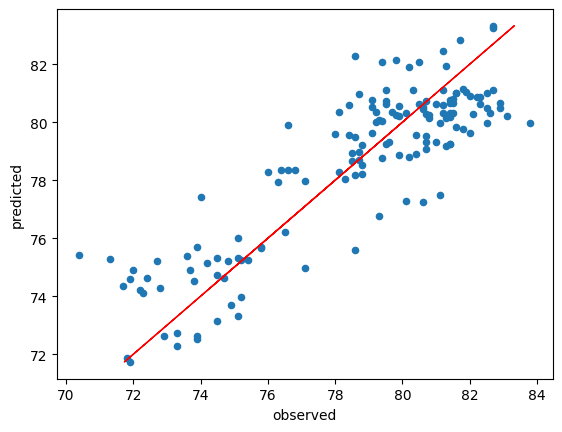

In [40]:
# check the distribution of the predicted and observed values
plt.figure()
residuals_dped_tbl.plot.scatter(x='observed', y='predicted')
plt.plot(y_dped_pred, y_dped_pred, color='red', linewidth=1)

plt.show()

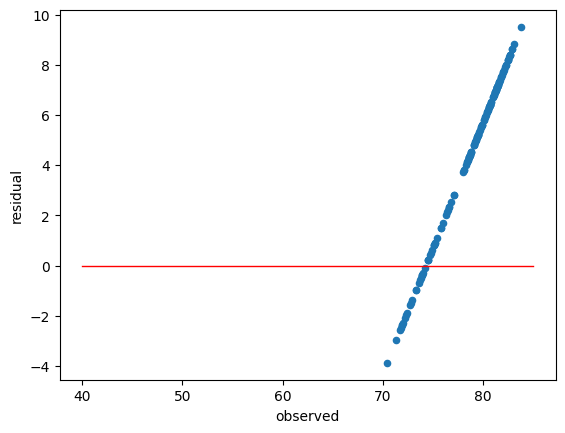

In [41]:
# check the distribution of residuals and observed values
residuals_dped_tbl.plot.scatter(x='observed', y='residual')
plt.plot([40,85], [0,0], color='red', linewidth=1)
plt.show()

The observed and predicted values exhibit a consistent upward linear trend.

### Developing countries

In [42]:
# split the Data to the independent variables and the dependant variable

X_developing = life_developing.drop(life_developing.columns[7], axis=1)
y_developing = life_developing.iloc[:,7]

In [43]:
# split the Data to train and test sets

X_ding_train, X_ding_test, y_ding_train, y_ding_test = train_test_split(X_developing,y_developing, test_size=0.25, random_state=44)    
print('Train data shape:',X_ding_train.shape)
print('Test data shape:',X_ding_test.shape)

Train data shape: (1704, 8)
Test data shape: (568, 8)


In [44]:
# fit the training set into the linear regression model

reg_ding = linear_model.LinearRegression()
reg_ding.fit(X_ding_train,y_ding_train)

print("Coefficients:" ,reg_ding.coef_)
print("Intercept:", reg_ding.intercept_)

Coefficients: [-5.11070954e-02  8.77566679e-01 -1.52865189e+00  1.14594692e-04
 -5.68897641e-02  2.59164979e-01  8.29776845e-01  1.97409970e-01]
Intercept: 22.990765864435495


In [45]:
#calculate predictions
y_ding_pred= pd.DataFrame(reg_ding.predict(X_ding_test))
y_ding_pred['index'] = X_ding_test.index
y_ding_pred.set_index('index', inplace=True, drop=True)
print(y_ding_pred)

               0
index           
1717   67.082742
2287   73.441167
862    63.693050
425    75.043715
2136   62.873420
...          ...
200    64.588438
1474   59.966735
330    67.846597
1464   60.978702
812    55.923640

[568 rows x 1 columns]


In [46]:
# check the accuracy of the model with the test data

mse_ding = mean_squared_error(y_ding_test, y_ding_pred)
r2score_ding = r2_score(y_ding_test, y_ding_pred) 


In [47]:
# create and fit the Lasso Regression model
lasso_ding = Lasso(alpha=0.001)  # medium alpha
lasso_ding.fit(X_ding_train, y_ding_train)

# make predictions
y_ding_pred = lasso_ding.predict(X_ding_test)

# evaluate the model
lasso_mse_ding = mean_squared_error(y_ding_test, y_ding_pred)
lasso_r2_ding = r2_score(y_ding_test, y_ding_pred)

In [48]:
# fit the training set into the ridge regression model

ridge = Ridge()
kf = KFold()
cv_ridge = cross_val_score(ridge, X_developing, y_developing, cv=kf)
ridge_ding = Ridge(alpha=0.001)
ridge_ding.fit(X_ding_train, y_ding_train)
y_ding_pred_ridge = ridge_ding.predict(X_ding_test)

ridge_mse_ding = mean_squared_error(y_ding_test, y_ding_pred)
ridge_r2_ding = r2_score(y_ding_test, y_ding_pred)

In [49]:

print('Mean Squared Error and R-squared results')
print('Lower MSE values indicate better model performance')
print('Higher R2 values indicate a better fit of the model to the data')
print('')
print('Linear Regression Test dataset result:')
print("MSE = ", mse_ding)
print("R2s = ", r2score_ding)
print('')
print('Lasso Regression Test dataset result:')
print("MSE:", lasso_mse_ding)
print("R2:", lasso_r2_ding)
print('')
print('Ridge Regression Test dataset result:')
print("MSE:", ridge_mse_ding)
print("R2:", ridge_r2_ding)

# MSE - меньше (ближе к 0) лучше, R2s - больше (ближе к 1 из 0-1) лучше

Mean Squared Error and R-squared results
Lower MSE values indicate better model performance
Higher R2 values indicate a better fit of the model to the data

Linear Regression Test dataset result:
MSE =  16.208529584359944
R2s =  0.7895569104640856

Lasso Regression Test dataset result:
MSE: 16.209230681162026
R2: 0.789547807789082

Ridge Regression Test dataset result:
MSE: 16.209230681162026
R2: 0.789547807789082


### Linear regression shows the best results with this analysis and so could be stated as the best model with this case. MSE of 16.2085 suggests that, on average, the squared difference between the predicted and actual values is 16.21. An R2 value of 0.78955 means that approximately 78.95% of the variance in the dependent variable is explained by the model.

In [50]:
# Linear Regression cross-validation
from sklearn.model_selection import cross_val_score
lin_k3 = 3
lin_scores_ding_3 = cross_val_score(estimator=reg_ding,
                        X=X_ding_test,
                        y=y_ding_test,
                        cv=lin_k3)
lin_k5 = 5
lin_scores_ding_5 = cross_val_score(estimator=reg_ding,
                        X=X_ding_test,
                        y=y_ding_test,
                        cv=lin_k5)
lin_k10 = 10
lin_scores_ding_10 = cross_val_score(estimator=reg_ding,
                        X=X_ding_test,
                        y=y_ding_test,
                        cv=lin_k10)

print('Performance of the Linear Regression model with 3, 5 and 10 folds.')
print()
print('Performance of the model with', lin_k3, 'individual folds')
print(lin_scores_ding_3)
print("Model performance based on %d-fold cross validation = %.3f" % (lin_k3, lin_scores_ding_3.mean()))
print()
print('Performance of the model with', lin_k5, 'individual folds')
print(lin_scores_ding_5)
print("Model performance based on %d-fold cross validation = %.3f" % (lin_k5, lin_scores_ding_5.mean()))
print()
print('Performance of the model with', lin_k10, 'individual folds')
print(lin_scores_ding_10)
print("Model performance based on %d-fold cross validation = %.3f" % (lin_k10, lin_scores_ding_10.mean()))

Performance of the Linear Regression model with 3, 5 and 10 folds.

Performance of the model with 3 individual folds
[0.78507755 0.76690012 0.76636384]
Model performance based on 3-fold cross validation = 0.773

Performance of the model with 5 individual folds
[0.79047868 0.79096892 0.78367983 0.69784204 0.80794088]
Model performance based on 5-fold cross validation = 0.774

Performance of the model with 10 individual folds
[0.75005117 0.82112522 0.77467799 0.81261227 0.82498273 0.7531495
 0.68660956 0.73724225 0.77532502 0.84052676]
Model performance based on 10-fold cross validation = 0.778


### Performance of the Linear Regression model with 3 individual folds shows us less variability across different folds. The model with 10 folds shows the highest average performance.

In [51]:
# calculate residuals (difference between the observed values and the predicted values)
residuals_ding = pd.DataFrame(data = y_ding_test)['Life_expectancy']-y_ding_pred[0]
print(residuals_ding)

1717     4.517671
2287     0.617671
862     -1.682329
425      7.917671
2136    -2.282329
          ...    
200      1.517671
1474    -6.582329
330      2.817671
1464   -10.282329
812    -12.182329
Name: Life_expectancy, Length: 568, dtype: float64


In [52]:
# set y_dped_pred as df
y_ding_pred = pd.DataFrame(y_ding_pred)
# reset the index of residuals_dped
residuals_ding.reset_index(drop=True, inplace=True)

# concatenate the DataFrames
residuals_ding_tbl = pd.concat([y_ding_test.reset_index(drop=True), y_ding_pred, residuals_ding], axis=1)
residuals_ding_tbl.columns = ['observed', 'predicted', 'residual']
print(residuals_ding_tbl)

     observed  predicted   residual
0        71.6  67.082329   4.517671
1        67.7  73.441004   0.617671
2        65.4  63.694569  -1.682329
3        75.0  75.043717   7.917671
4        64.8  62.874090  -2.282329
..        ...        ...        ...
563      68.6  64.588899   1.517671
564      60.5  59.966796  -6.582329
565      69.9  67.845072   2.817671
566      56.8  60.978901 -10.282329
567      54.9  55.924585 -12.182329

[568 rows x 3 columns]


<Figure size 640x480 with 0 Axes>

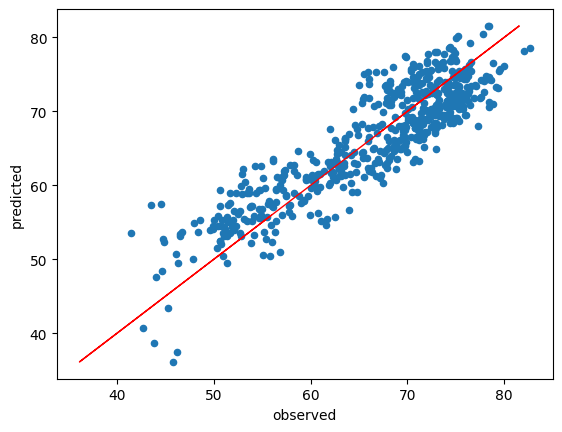

In [53]:
# check the distribution of the predicted and observed values
plt.figure()
residuals_ding_tbl.plot.scatter(x='observed', y='predicted')
plt.plot(y_ding_pred, y_ding_pred, color='red', linewidth=1)

plt.show()

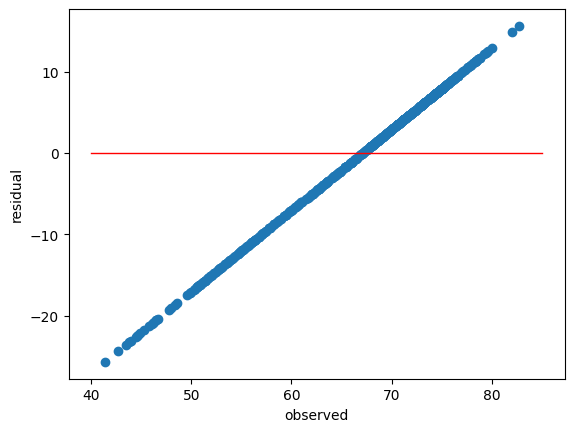

In [54]:
# check the distribution of residuals and observed values
residuals_ding_tbl.plot.scatter(x='observed', y='residual')
plt.scatter(x=pd.DataFrame(data = y_ding_test)['Life_expectancy'], y=residuals_ding)
plt.plot([40,85], [0,0], color='red', linewidth=1)
plt.show()

The observed and predicted values exhibit a dense consistent upward linear trend.

### 2) Region-based analysis (Africa, Middle East, European Union, Rest of Europe, Asia, Oceania, Central America and Caribbean, North America, South America)

In [55]:
# create dataframes based on Regions
print(life['Region'].unique())

life_Africa = life[life['Region'] == 'Africa']
life_Africa = life_Africa.drop(['Country','Infant_deaths','Under_five_deaths','Adult_mortality','Population_mln','Economy_status_Developed','Economy_status_Developing'], axis=1)
life_Middle_East = life[life['Region'] == 'Middle East']
life_Middle_East = life_Middle_East.drop(['Country','Infant_deaths','Under_five_deaths','Adult_mortality','Population_mln','Economy_status_Developed','Economy_status_Developing'], axis=1)
life_Europe = life[life['Region'] == 'European Union']
life_Europe = life_Europe.drop(['Country','Infant_deaths','Under_five_deaths','Adult_mortality','Population_mln','Economy_status_Developed','Economy_status_Developing'], axis=1)
life_Asia = life[life['Region'] == 'Asia']
life_Asia = life_Asia.drop(['Country','Infant_deaths','Under_five_deaths','Adult_mortality','Population_mln','Economy_status_Developed','Economy_status_Developing'], axis=1)
life_Oceania = life[life['Region'] == 'Oceania']
life_Oceania = life_Oceania.drop(['Country','Infant_deaths','Under_five_deaths','Adult_mortality','Population_mln','Economy_status_Developed','Economy_status_Developing'], axis=1)
life_Rest_of_Europe = life[life['Region'] == 'Rest of Europe']
life_Rest_of_Europe = life_Rest_of_Europe.drop(['Country','Infant_deaths','Under_five_deaths','Adult_mortality','Population_mln','Economy_status_Developed','Economy_status_Developing'], axis=1)
life_Central_America_and_Caribbean = life[life['Region'] == 'Central America and Caribbean']
life_Central_America_and_Caribbean = life_Central_America_and_Caribbean.drop(['Country','Infant_deaths','Under_five_deaths','Adult_mortality','Population_mln','Economy_status_Developed','Economy_status_Developing'], axis=1)
life_North_America = life[life['Region'] == 'North America']
life_North_America = life_North_America.drop(['Country','Infant_deaths','Under_five_deaths','Adult_mortality','Population_mln','Economy_status_Developed','Economy_status_Developing'], axis=1)
life_South_America = life[life['Region'] == 'South America']
life_South_America = life_South_America.drop(['Country','Infant_deaths','Under_five_deaths','Adult_mortality','Population_mln','Economy_status_Developed','Economy_status_Developing'], axis=1)

['Middle East' 'European Union' 'Asia' 'South America'
 'Central America and Caribbean' 'Rest of Europe' 'Africa' 'Oceania'
 'North America']


In [56]:
# concat region datasets to new df
lifes = [life_Africa, life_Middle_East, life_Europe, life_Asia, life_Oceania,
       life_Rest_of_Europe, life_Central_America_and_Caribbean,
       life_North_America, life_South_America]

life_regions = pd.concat(lifes, ignore_index=True)
life_regions

Region  Year  Alcohol_consumption  Hepatitis_B  Measles   BMI  \
0            Africa  2007                 0.15           75       64  23.5   
1            Africa  2012                 7.47           82       64  24.9   
2            Africa  2011                 1.67           91       58  23.7   
3            Africa  2003                 0.90           71       64  22.3   
4            Africa  2011                 0.89           73       64  21.1   
...             ...   ...                  ...          ...      ...   ...   
2859  South America  2002                 4.32           78       93  25.0   
2860  South America  2015                 6.21           87       83  26.7   
2861  South America  2010                 5.56           95       82  25.8   
2862  South America  2012                 8.35           90       74  27.6   
2863  South America  2000                 7.68           73       56  26.1   

      Polio  Diphtheria  Incidents_HIV  GDP_per_capita  \
0        75          75           0.02            1166   
1        80          82           1.57            7181   
2        91          91           0.93            1580   
3        50          50           2.23            2072   
4        73          73           0.15             464   
...     ...         ...            ...             ...   
2859     83          81           0.23            4003   
2860     87          87           0.40           17318   
2861     95          95           0.65            4847   
2862     90          90           0.19           12973   
2863     88          83           0.16           10731   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                             7.3                       7.2        3.5   
1                             6.3                       6.2        7.8   
2                             6.9                       6.8        6.8   
3                             9.1                       8.8        5.7   
4                             7.5                       7.4        6.1   
...                           ...                       ...        ...   
2859                          2.5                       2.3        6.5   
2860                          1.6                       1.5       10.1   
2861                          5.6                       5.3        8.1   
2862                          0.8                       0.8        9.9   
2863                          1.2                       1.1        9.1   

      Life_expectancy  
0                60.7  
1                62.9  
2                61.4  
3                53.8  
4                63.8  
...               ...  
2859             73.5  
2860             72.6  
2861             68.1  
2862             79.2  
2863             73.6  

[2864 rows x 14 columns]

In [57]:
# group by 'Region' and 'Year' and calculate the mean for each one
life_regions_mean = life_regions.groupby(['Region','Year']).mean().reset_index()

# round the values to two decimal places
life_regions_mean = life_regions_mean.round(2)
life_regions_mean

Region  Year  Alcohol_consumption  Hepatitis_B  Measles    BMI  \
0           Africa  2000                 3.06        72.96    67.06  22.65   
1           Africa  2001                 3.06        73.90    66.65  22.75   
2           Africa  2002                 3.03        72.78    67.08  22.83   
3           Africa  2003                 2.91        74.39    67.31  22.91   
4           Africa  2004                 2.86        75.31    67.49  23.00   
..             ...   ...                  ...          ...      ...    ...   
139  South America  2011                 5.75        90.25    76.17  26.41   
140  South America  2012                 5.92        90.75    74.83  26.50   
141  South America  2013                 5.78        90.50    72.50  26.59   
142  South America  2014                 5.74        90.58    75.42  26.68   
143  South America  2015                 5.61        92.00    77.33  26.79   

     Polio  Diphtheria  Incidents_HIV  GDP_per_capita  \
0    65.43       64.69           3.86         1890.78   
1    66.16       65.67           3.65         1942.47   
2    69.84       68.10           3.46         1971.27   
3    71.75       70.57           3.29         2016.45   
4    72.63       71.88           3.14         2113.61   
..     ...         ...            ...             ...   
139  89.83       90.33           0.27         8257.08   
140  89.33       90.50           0.27         8587.92   
141  88.42       90.67           0.26         8778.17   
142  89.50       90.33           0.26         9136.67   
143  91.17       91.92           0.25         9229.50   

     Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                           7.90                      7.74       3.95   
1                           7.35                      7.18       4.01   
2                           7.86                      7.52       4.11   
3                           7.32                      7.32       4.17   
4                           7.48                      7.64       4.26   
..                           ...                       ...        ...   
139                         2.07                      1.97       8.44   
140                         2.04                      1.96       8.48   
141                         2.03                      1.93       8.62   
142                         2.02                      1.93       8.76   
143                         2.02                      1.92       8.84   

     Life_expectancy  
0              54.14  
1              54.36  
2              54.59  
3              54.96  
4              55.45  
..               ...  
139            73.70  
140            73.92  
141            74.11  
142            74.27  
143            74.47  

[144 rows x 14 columns]

### Presenting few scatters to visualize data

In [90]:
import plotly.express as px
# to make scatters visible in html format
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [244]:
# pip install --upgrade nbformat   

In [94]:
px.scatter(life_regions_mean,
           y= "Alcohol_consumption",
           x= 'Life_expectancy',
           animation_group='Region',
           size='Alcohol_consumption',
           color='Region',
           template='plotly_dark',
           title='<b> Life Expectancy in Relation to Alcohol_consumption'
           )

In [96]:
px.scatter(life_regions_mean,
           y= "Incidents_HIV",
           x= 'Life_expectancy',
           animation_group='Region',
           size='Incidents_HIV',
           color='Region',
           template='plotly_dark',
           title='<b> Life Expectancy in Relation to Incidents_HIV'
            )

In [97]:
px.scatter(life_regions_mean,
           y= "GDP_per_capita",
           x= 'Life_expectancy',
           animation_group='Region',
           size='GDP_per_capita',
           color='Region',
           template='plotly_dark',
           title='<b> Life Expectancy in Relation to GDP_per_capita'
            )

In [98]:
px.scatter(life_regions_mean,
           y= "Hepatitis_B",
           x= 'Life_expectancy',
           animation_group='Region',
           size='Hepatitis_B',
           color='Region',
           template='plotly_dark',
           title='<b> Life Expectancy in Relation to Hepatitis_B'
            )

In [99]:
px.scatter(life_regions_mean,
           y= "BMI",
           x= 'Life_expectancy',
           animation_group='Region',
           size='BMI',
           color='Region',
           template='plotly_dark',
           title='<b> Life Expectancy in Relation to BMI'
            )

In [100]:
px.scatter(life_regions_mean,
           y= "Measles",
           x= 'Life_expectancy',
           animation_group='Region',
           size='Measles',
           color='Region',
           template='plotly_dark',
           title='<b> Life Expectancy in Relation to Measles'
            )

In [101]:
px.scatter(life_regions_mean,
           y= "Diphtheria",
           x= 'Life_expectancy',
           animation_group='Region',
           size='Diphtheria',
           color='Region',
           template='plotly_dark',
           title='<b> Life Expectancy in Relation to Diphtheria'
            )

In [102]:
px.scatter(life_regions_mean,
           y= "Polio",
           x= 'Life_expectancy',
           animation_group='Region',
           size='Polio',
           color='Region',
           template='plotly_dark',
           title='<b> Life Expectancy in Relation to Polio'
            )

In [103]:
px.scatter(life_regions_mean.sort_values(by='Year'),
           y='Schooling',
           x='Life_expectancy',
           animation_frame='Year',
           animation_group='Region',
           template='plotly_dark',
           color='Region',
           size='Life_expectancy',
           title='<b>Life Expectancy in Relation to Schooling in Every Year'
           )

### Next we can check VIF (Variance Inflation Factor)

 VIF is a measure that quantifies the severity of multicollinearity in a set of variables within a regression model. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, which can lead to issues in the estimation of the regression coefficients.

VIF показывает, насколько сильно независимые переменные в модели регрессии взаимосвязаны. Высокие значения VIF означают, что независимые переменные могут мешать друг другу при отдельной оценке их влияния на зависимую переменную, что делает результаты менее надежными.
Короче, VIF измеряет взаимосвязь между независимыми переменными и указывает на возможные проблемы при оценке их влияния на зависимую переменную.

In [74]:
# make a table for the VIF values of all region based data frames' X variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
life_Africa_num = life_Africa.select_dtypes(include=np.number)

X_Africa = life_Africa_num.drop(['Life_expectancy'], axis = 1).values
y_Africa = life_Africa_num['Life_expectancy'].values
names_Africa = life_Africa_num.drop(['Year','Life_expectancy'], axis = 1).columns

vif_Africa = pd.DataFrame()
vif_Africa["VIF Factor"] = [variance_inflation_factor(X_Africa, i) for i in range(names_Africa.shape[0])]
vif_Africa["features"] = names_Africa
vif_Africa.round()

VIF Factor                     features
0        362.0          Alcohol_consumption
1          3.0                  Hepatitis_B
2         95.0                      Measles
3         25.0                          BMI
4        415.0                        Polio
5        197.0                   Diphtheria
6        252.0                Incidents_HIV
7          2.0               GDP_per_capita
8          4.0  Thinness_ten_nineteen_years
9         30.0     Thinness_five_nine_years
10        29.0                    Schooling

In [76]:
life_Middle_East_num = life_Middle_East.select_dtypes(include=np.number)

X_Middle_East = life_Middle_East_num.drop(['Life_expectancy'], axis = 1).values
y_Middle_East = life_Middle_East_num['Life_expectancy'].values
names_Middle_East = life_Middle_East_num.drop(['Year','Life_expectancy'], axis = 1).columns

vif_Middle_East = pd.DataFrame()
vif_Middle_East["VIF Factor"] = [variance_inflation_factor(X_Middle_East, i) for i in range(names_Middle_East.shape[0])]
vif_Middle_East["features"] = names_Middle_East
vif_Middle_East.round()

VIF Factor                     features
0       2225.0          Alcohol_consumption
1          7.0                  Hepatitis_B
2        211.0                      Measles
3         47.0                          BMI
4       1784.0                        Polio
5       1502.0                   Diphtheria
6       1349.0                Incidents_HIV
7         13.0               GDP_per_capita
8          6.0  Thinness_ten_nineteen_years
9       4664.0     Thinness_five_nine_years
10      4536.0                    Schooling

In [78]:
life_Europe_num = life_Europe.select_dtypes(include=np.number)

X_Europe = life_Europe_num.drop(['Life_expectancy'], axis = 1).values
y_Europe = life_Europe_num['Life_expectancy'].values
names_Europe = life_Europe_num.drop(['Year','Life_expectancy'], axis = 1).columns

vif_Europe = pd.DataFrame()
vif_Europe["VIF Factor"] = [variance_inflation_factor(X_Europe, i) for i in range(names_Europe.shape[0])]
vif_Europe["features"] = names_Europe
vif_Europe.round()

VIF Factor                     features
0       3537.0          Alcohol_consumption
1         29.0                  Hepatitis_B
2         84.0                      Measles
3        145.0                          BMI
4       2954.0                        Polio
5       6542.0                   Diphtheria
6       6708.0                Incidents_HIV
7          4.0               GDP_per_capita
8          6.0  Thinness_ten_nineteen_years
9        386.0     Thinness_five_nine_years
10       328.0                    Schooling

In [79]:
life_Asia_num = life_Asia.select_dtypes(include=np.number)

X_Asia = life_Asia_num.drop(['Life_expectancy'], axis = 1).values
y_Asia = life_Asia_num['Life_expectancy'].values
names_Asia = life_Asia_num.drop(['Year','Life_expectancy'], axis = 1).columns

vif_Asia = pd.DataFrame()
vif_Asia["VIF Factor"] = [variance_inflation_factor(X_Asia, i) for i in range(names_Asia.shape[0])]
vif_Asia["features"] = names_Asia
vif_Asia.round()

VIF Factor                     features
0        389.0          Alcohol_consumption
1          3.0                  Hepatitis_B
2         67.0                      Measles
3         26.0                          BMI
4        402.0                        Polio
5        460.0                   Diphtheria
6        511.0                Incidents_HIV
7          3.0               GDP_per_capita
8          2.0  Thinness_ten_nineteen_years
9         14.0     Thinness_five_nine_years
10        15.0                    Schooling

In [80]:
life_Oceania_num = life_Oceania.select_dtypes(include=np.number)

X_Oceania = life_Oceania_num.drop(['Life_expectancy'], axis = 1).values
y_Oceania = life_Oceania_num['Life_expectancy'].values
names_Oceania = life_Oceania_num.drop(['Year','Life_expectancy'], axis = 1).columns

vif_Oceania = pd.DataFrame()
vif_Oceania["VIF Factor"] = [variance_inflation_factor(X_Oceania, i) for i in range(names_Oceania.shape[0])]
vif_Oceania["features"] = names_Oceania
vif_Oceania.round()

VIF Factor                     features
0        837.0          Alcohol_consumption
1         32.0                  Hepatitis_B
2        290.0                      Measles
3         35.0                          BMI
4        920.0                        Polio
5        204.0                   Diphtheria
6        446.0                Incidents_HIV
7          9.0               GDP_per_capita
8         25.0  Thinness_ten_nineteen_years
9         16.0     Thinness_five_nine_years
10        20.0                    Schooling

In [81]:
life_Rest_of_Europe_num = life_Rest_of_Europe.select_dtypes(include=np.number)

X_Rest_of_Europe = life_Rest_of_Europe_num.drop(['Life_expectancy'], axis = 1).values
y_Rest_of_Europe = life_Rest_of_Europe_num['Life_expectancy'].values
names_Rest_of_Europe = life_Rest_of_Europe_num.drop(['Year','Life_expectancy'], axis = 1).columns

vif_Rest_of_Europe = pd.DataFrame()
vif_Rest_of_Europe["VIF Factor"] = [variance_inflation_factor(X_Rest_of_Europe, i) for i in range(names_Rest_of_Europe.shape[0])]
vif_Rest_of_Europe["features"] = names_Rest_of_Europe
vif_Rest_of_Europe.round()

VIF Factor                     features
0       4817.0          Alcohol_consumption
1         11.0                  Hepatitis_B
2        101.0                      Measles
3        179.0                          BMI
4       4944.0                        Polio
5       1571.0                   Diphtheria
6       1120.0                Incidents_HIV
7          3.0               GDP_per_capita
8         10.0  Thinness_ten_nineteen_years
9        829.0     Thinness_five_nine_years
10       730.0                    Schooling

In [82]:
life_Central_America_and_Caribbean_num = life_Central_America_and_Caribbean.select_dtypes(include=np.number)

X_Central_America_and_Caribbean = life_Central_America_and_Caribbean_num.drop(['Life_expectancy'], axis = 1).values
y_Central_America_and_Caribbean = life_Central_America_and_Caribbean_num['Life_expectancy'].values
names_Central_America_and_Caribbean = life_Central_America_and_Caribbean_num.drop(['Year','Life_expectancy'], axis = 1).columns

vif_Central_America_and_Caribbean = pd.DataFrame()
vif_Central_America_and_Caribbean["VIF Factor"] = [variance_inflation_factor(X_Central_America_and_Caribbean, i) for i in range(names_Central_America_and_Caribbean.shape[0])]
vif_Central_America_and_Caribbean["features"] = names_Central_America_and_Caribbean
vif_Central_America_and_Caribbean.round()

VIF Factor                     features
0       1210.0          Alcohol_consumption
1         16.0                  Hepatitis_B
2        348.0                      Measles
3        110.0                          BMI
4       1342.0                        Polio
5        750.0                   Diphtheria
6        739.0                Incidents_HIV
7          5.0               GDP_per_capita
8          7.0  Thinness_ten_nineteen_years
9       1975.0     Thinness_five_nine_years
10      1708.0                    Schooling

In [83]:
life_North_America_num = life_North_America.select_dtypes(include=np.number)

X_North_America = life_North_America_num.drop(['Life_expectancy'], axis = 1).values
y_North_America = life_North_America_num['Life_expectancy'].values
names_North_America = life_North_America_num.drop(['Year','Life_expectancy'], axis = 1).columns

vif_North_America = pd.DataFrame()
vif_North_America["VIF Factor"] = [variance_inflation_factor(X_North_America, i) for i in range(names_North_America.shape[0])]
vif_North_America["features"] = names_North_America
vif_North_America.round()

VIF Factor                     features
0      24262.0          Alcohol_consumption
1       1459.0                  Hepatitis_B
2        132.0                      Measles
3        927.0                          BMI
4      23235.0                        Polio
5       5289.0                   Diphtheria
6       6256.0                Incidents_HIV
7        911.0               GDP_per_capita
8        953.0  Thinness_ten_nineteen_years
9        683.0     Thinness_five_nine_years
10       978.0                    Schooling

In [84]:
life_South_America_num = life_South_America.select_dtypes(include=np.number)

X_South_America = life_South_America_num.drop(['Life_expectancy'], axis = 1).values
y_South_America = life_South_America_num['Life_expectancy'].values
names_South_America = life_South_America_num.drop(['Year','Life_expectancy'], axis = 1).columns

vif_South_America = pd.DataFrame()
vif_South_America["VIF Factor"] = [variance_inflation_factor(X_South_America, i) for i in range(names_South_America.shape[0])]
vif_South_America["features"] = names_South_America
vif_South_America.round()

VIF Factor                     features
0       5383.0          Alcohol_consumption
1         35.0                  Hepatitis_B
2        219.0                      Measles
3         21.0                          BMI
4       6605.0                        Polio
5        691.0                   Diphtheria
6        830.0                Incidents_HIV
7         18.0               GDP_per_capita
8         17.0  Thinness_ten_nineteen_years
9       1425.0     Thinness_five_nine_years
10      1473.0                    Schooling

As we can see, many VIF values are quite high, so it might be worth exploring options for managing multicollinearity, such as excluding variables with high VIF or using alternative analysis methods.

# Final Conclusion:

The comprehensive analysis of global life expectancy has revealed several key factors that significantly impact this crucial metric, particularly when distinguishing between developed and developing countries and across different regions.

## Developed Countries:
In developed nations, GDP per capita and thinness of youth have emerged as the most influential factors affecting life expectancy. The positive correlation with GDP per capita suggests the importance of economic prosperity in enhancing healthcare and overall well-being. Simultaneously, the negative correlation with thinness underscores the significance of nutritional health in these regions.

## Developing Countries:
For developing countries, a more complex interplay of factors has been observed. BMI, Incidents of HIV, Schooling, and Immunization have shown significant correlations with life expectancy. This complexity reflects the diverse challenges faced by developing nations, where healthcare, education, and disease prevention play critical roles.

## Regional Variances:
The analysis of life expectancy across diverse regions highlighted consistent patterns of low VIF values for GDP per capita, Hepatitis B immunisation, and Nutritional Factors. These findings suggest a nuanced interplay between economic, nutritional, and health factors shaping life expectancy outcomes globally.

## Comparison:
The alignment of significant factors, such as GDP, Immunization (Hepatitis B), and Weight (BMI and Thinness), across both linear regression and VIF analyses suggests a robust and consistent pattern. The convergence of these results underscores the reliability of identified factors in influencing life expectancy. This coherence enhances confidence in the validity of the factors highlighted, reinforcing their importance in understanding and predicting life expectancy outcomes.

## Implications and Relevance:
Understanding the factors influencing life expectancy on a global scale is pivotal for policymakers, healthcare professionals, and organizations working towards improving public health. The nuanced insights gained from the analysis enable targeted interventions based on regional needs. For instance, focusing on economic development in developed nations and addressing a diverse set of challenges in developing countries can contribute to improving overall life expectancy.

## Future Directions:
Further research and exploration into the evolving dynamics of these factors and their impact on life expectancy could provide valuable insights. Additionally, considering the changing global landscape and emerging trends, continuous monitoring and analysis would be beneficial for adapting strategies and interventions accordingly.

In conclusion, the analysis offers valuable information for informed decision-making and underscores the relevance of tailoring interventions to specific country and regional contexts.